In [208]:
import pandas as pd
D = pd.read_csv(r"C:\Users\Owner\Desktop\python\titanic-passengers.csv", delimiter=';')
D.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [209]:
D.info()
D.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [210]:
D.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [211]:
D['Age'].fillna(D['Age'].mean(), inplace=True)
D['Age']=D['Age'].astype(int)
D['Embarked'].fillna(D['Embarked'].mode()[0], inplace=True)
D=D.drop(['Cabin'],axis=1)
D

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29,0,0,349215,7.8958,S


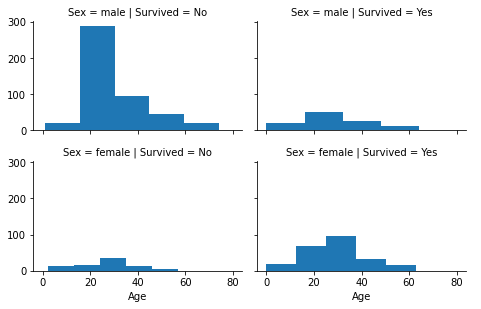

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.FacetGrid(D, row='Sex', col='Survived', height=2.2, aspect=1.5)
g.map(plt.hist,'Age',bins=5)
g.add_legend()

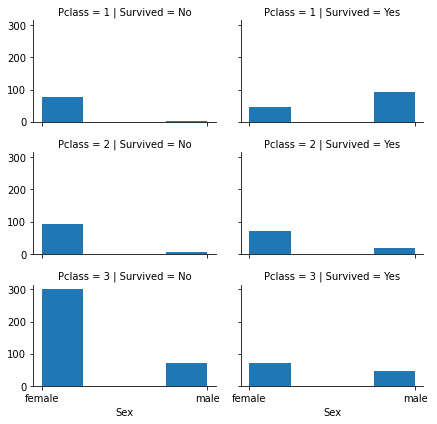

In [195]:
g=sns.FacetGrid(D, row='Pclass', col='Survived', height=2, aspect=1.5)
g.map(plt.hist,'Sex',bins=4)
g.add_legend()

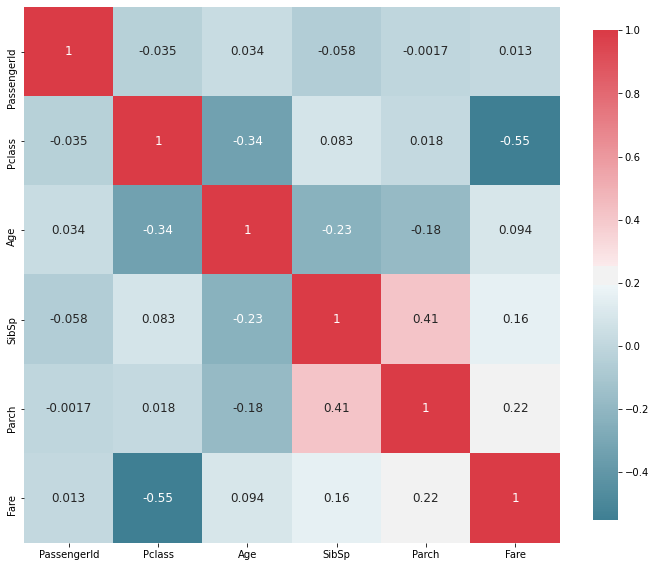

In [213]:
def plot_correlation_map(D):
    corr = D.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(D)

In [143]:
#Through this code, we implemented a correlation matrix heatmap in order to check correlations among the columns.
#Red means positive, red means negative. The stronger the color, the larger the correlation magnitude.

In [214]:
new_Pclass={'S':0,'Q':1,'C':2}
D.replace(new_Pclass,inplace=True)

new_Survived={'No':0,'Yes':1}
D.replace(new_Survived,inplace=True)


D[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


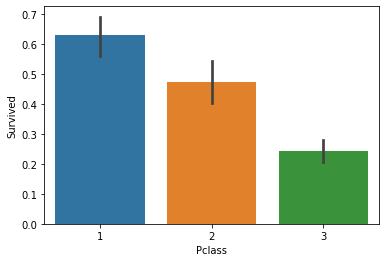

In [215]:
sns.barplot(x='Pclass', y='Survived',data=D)

In [216]:
D['Title']=D['Name'].str.extract(' ([a-zA-Z]+).')
D

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13.0000,0,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,0,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20,0,0,350050,7.8542,0,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29,0,4,349909,21.0750,0,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52.0000,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,2,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22,0,0,2669,7.2292,2,Mr
888,535,0,3,"Cacic, Miss. Marija",female,30,0,0,315084,8.6625,0,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29,0,0,349215,7.8958,0,Mr


In [217]:
Title_Dictionary = { "Capt": "Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty", 
                    "Don":"Royalty",
                    "Sir" :"Royalty",
                    "Lady" : "Royalty",
                    "the Countess" : "Royalty",
                    "Dona": "Royalty" ,
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss" :"Miss",
                    "Ms":"Mrs",
                    "Mr" :"Mrs",
                    "Mrs" :"Mrs",
                    "Master" :"Master" }
D["Title"]=D["Title"].map(Title_Dictionary)
D

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13.0000,0,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,0,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",male,20,0,0,350050,7.8542,0,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29,0,4,349909,21.0750,0,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52.0000,0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,2,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22,0,0,2669,7.2292,2,Mrs
888,535,0,3,"Cacic, Miss. Marija",female,30,0,0,315084,8.6625,0,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29,0,0,349215,7.8958,0,Mrs


In [218]:
D['FamilySize'] = D['SibSp'] + D['Parch'] + 1
D

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13.0000,0,Mrs,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,0,Mrs,1
2,641,0,3,"Jensen, Mr. Hans Peder",male,20,0,0,350050,7.8542,0,Mrs,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29,0,4,349909,21.0750,0,Mrs,5
4,672,0,1,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52.0000,0,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,2,Mrs,2
887,61,0,3,"Sirayanian, Mr. Orsen",male,22,0,0,2669,7.2292,2,Mrs,1
888,535,0,3,"Cacic, Miss. Marija",female,30,0,0,315084,8.6625,0,Miss,1
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29,0,0,349215,7.8958,0,Mrs,1


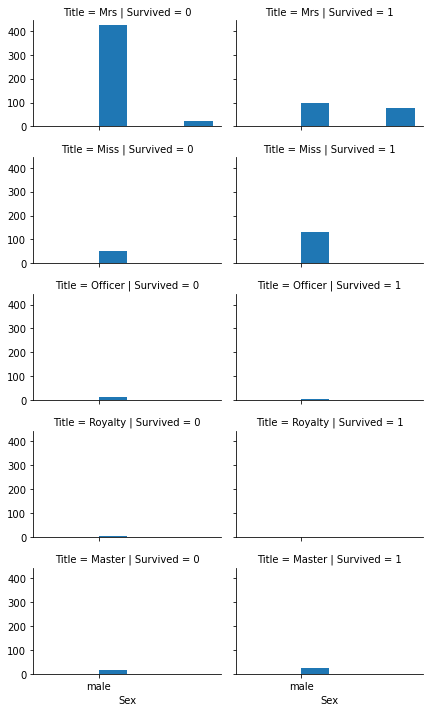

In [219]:
g=sns.FacetGrid(D, row='Title', col='Survived', height=2, aspect=1.5)
g.map(plt.hist,'Sex',bins=4)
g.add_legend()

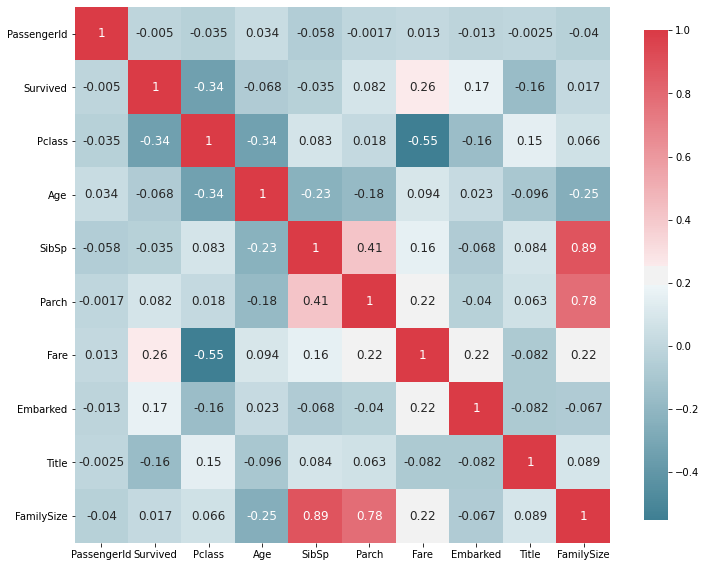

In [222]:
new_em={'Officer':0,'Royalty':1,'Miss':2,'Mrs':3,'Master':4}
D.replace(new_em,inplace=True)
D.corr()
plot_correlation_map(D)